In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.optimize import minimize,curve_fit

# Magic command Needed for showing plots in jupyter notebooks
%matplotlib inline

In [2]:
# Adjust plot dpi and other graphical parameters
plt.rcParams.update(**{
    'figure.dpi':150,
    'figure.figsize':(4,3)
})

# 1. Linear regression on autompg dataset

The `autompg` dataset concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. There are 398 instances.

**Attribute information**:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)
    
There are 6 missing entries for `horsepower`, indicated in the file as  `?`. 

In the following code block,

1. The data is loaded from disk.
2. Rows with missing data are dropped
3. Redundant columns are deleted
4. The output is extracted into variable `y`
5. The predictors are extracted into variable `X` and standardized.

In [3]:
# read autompg data - replace filedir with the actual location
FILEDIR = '../data'
auto = pd.read_csv(
    os.path.join(FILEDIR,'auto-mpg.csv'),
    na_values = '?' # needed to mark these entries as missing
)

# drop missing values
# axis = 0 - drop 
auto = auto.dropna(axis=0)

# car name is unique for each instance
# deleting the column
del auto['car name']


# preparing data for linear regression
# extract output
y = auto['mpg']

# standardizing columns in order to directly compare coefficients
X = auto.drop('mpg',axis=1)
X_mean,X_std = X.mean(axis=0),X.std(axis=0)
X = (X-X_mean)/X_std

(a) Fit a linear regression model for predicting mileage (`mpg`) as a function of the other variables. Use the `sm.OLS` class (with arguments `y` and `X`) from the statsmodels library. Print the summary of the model.

(b) Plot the residuals vs the fitted values. Do you notice anything? The residuals can be extracted through the `.resid` attribute of the `OLS` object.

**Note**: `OLS` fits a model without the intercept term. 

In [5]:
#### YOUR CODE GOES HERE #####
X = sm.add_constant(X,prepend=True)

fit_lm = sm.OLS(y,X).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.04e-139
Time:                        11:56:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4459      0.168    139.498   

<AxesSubplot:>

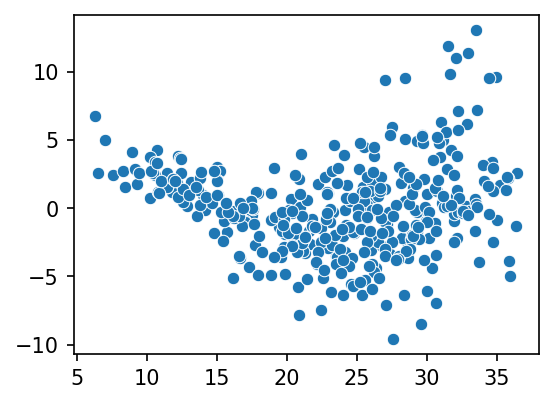

In [6]:
#### Plot code ####
resid = fit_lm.resid

fitted = fit_lm.fittedvalues
fitted = y-resid

fig,ax = plt.subplots(1,1)
sns.scatterplot(
    x = fitted,
    y = resid,
    ax=ax
)

# 2. Non-linear regression


Consider the following generated data:

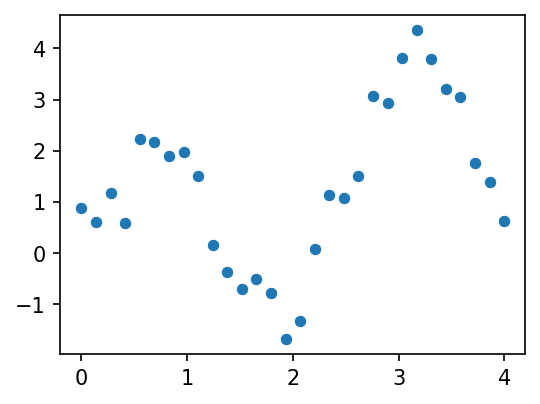

In [7]:
np.random.seed(11)
x = np.linspace(0,4,30)
y = 0.5*x + 2*np.sin(2.5*x) + 0.5*np.random.randn(x.shape[0])

fig,ax = plt.subplots(1,1)
_ = sns.scatterplot(x=x,y=y,ax=ax)

Fit the following model to this data:

$$
\widehat{y}\left(x,\theta \right) = \theta_0 + \theta_1 x  + \theta_3 \sin \left(\theta_2 x\right)
$$

using (a) general non-linear minimization (b) least squares algorithm. For each case, print the final values of the parameters.

Start from the initial guess $\boldsymbol{\theta} = [1,0.3,2,1.5]$.

In [10]:
#### CODE FOR NLM ####
def model(x,theta):
    return theta[0] + theta[1]*x + theta[3]*np.sin(theta[2]*x)


def sse(theta,x,y):
    yhat = model(x,theta)
    return np.sum((y-yhat)**2)



res = minimize(
    fun = sse,
    x0 = np.array([1,0.3,2,1.5]),
    args= (x,y)
)

res

      fun: 6.0761543111080405
 hess_inv: array([[ 0.06846039, -0.02559877, -0.00157079, -0.01040862],
       [-0.02559877,  0.01312168,  0.00131071,  0.00207018],
       [-0.00157079,  0.00131071,  0.00137434, -0.00022721],
       [-0.01040862,  0.00207018, -0.00022721,  0.0381792 ]])
      jac: array([-5.96046448e-08, -1.19209290e-07, -4.17232513e-07, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 78
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([-0.20958212,  0.60274236,  2.52467224,  2.05967246])

In [11]:
res.x

array([-0.20958212,  0.60274236,  2.52467224,  2.05967246])

In [12]:
#### CODE FOR NLS ####
def model_nls(x,*theta):
    return model(x,theta)

theta_nls,cov_theta_nls = curve_fit(
    f = model_nls, # the model to be fit to data 
    xdata = x,
    ydata = y,
    p0 = np.array([1,0.3,2,1.5]), # initial guess
)

In [13]:
theta_nls

array([-0.20958311,  0.60274318,  2.5246731 ,  2.05967232])